In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
import warnings
warnings.filterwarnings('ignore')

In [90]:
import os

In [91]:
data = os.listdir('./images')

In [92]:
len(data)

1646

In [93]:
import pandas as pd

In [94]:
df = pd.read_csv('image_label.csv')

In [95]:
df.head()

,Image_name,Plane
0,Patient01018_Plane3_2_of_3,Fetal brain
1,Patient00770_Plane3_2_of_3,Fetal brain
2,Patient00853_Plane3_1_of_3,Fetal brain
3,Patient01230_Plane3_5_of_5,Fetal brain
4,Patient01494_Plane3_3_of_4,Fetal brain


In [96]:
df.shape

(1646, 2)

In [97]:
data[0]

'Patient00168_Plane6_1_of_4.png'

In [98]:
df['Plane'].unique()

array(['Fetal brain', 'Fetal femur', 'Fetal thorax', 'Fetal abdomen'],
      dtype=object)

In [99]:
type(data)

list

In [100]:
data.sort()

In [101]:
data[0]

'Patient00168_Plane6_1_of_4.png'

In [102]:
data[1]

'Patient00188_Plane5_1_of_1.png'

In [103]:
data[2]

'Patient00216_Plane6_2_of_3.png'

In [104]:
l  = df.sort_values(by=['Image_name'])

In [105]:
l.head(20)

,Image_name,Plane
1274,Patient00168_Plane6_1_of_4,Fetal thorax
634,Patient00188_Plane5_1_of_1,Fetal femur
1127,Patient00216_Plane6_2_of_3,Fetal thorax
1461,Patient00305_Plane2_1_of_2,Fetal abdomen
290,Patient00305_Plane3_1_of_5,Fetal brain
133,Patient00305_Plane3_5_of_5,Fetal brain
1008,Patient00305_Plane6_1_of_3,Fetal thorax
569,Patient00629_Plane5_1_of_1,Fetal brain
1456,Patient00631_Plane2_1_of_1,Fetal abdomen
776,Patient00640_Plane5_1_of_1,Fetal femur


In [106]:
from PIL import Image
import numpy as np

In [107]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

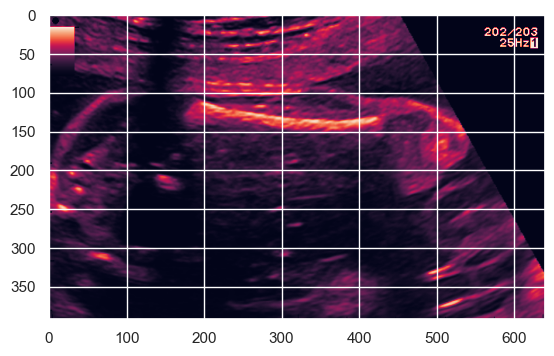

In [108]:
img = mpimg.imread('./images/'+data[1])
imgplot = plt.imshow(img)
plt.show()

In [109]:
im = []


for img_file in data:
    image = Image.open('./images/'+img_file)
    image = image.resize((256,256))
    image = image.convert('RGB')
    image = np.array(image)
    im.append(image)

In [110]:
X_train = np.array(X)

In [111]:
X_train.shape

(1646, 256, 256, 3)

In [112]:
l.shape

(1646, 2)

In [113]:
y_train = np.array(l['Plane'])

In [114]:
y_train.shape

(1646,)

In [116]:
y_train=y_train.reshape(-1,1)

In [117]:
y_train.shape

(1646, 1)

In [118]:
ndf = pd.get_dummies(l,columns = ['Plane'])

In [119]:
ndf.head()

,Image_name,Plane_Fetal abdomen,Plane_Fetal brain,Plane_Fetal femur,Plane_Fetal thorax
1274,Patient00168_Plane6_1_of_4,0,0,0,1
634,Patient00188_Plane5_1_of_1,0,0,1,0
1127,Patient00216_Plane6_2_of_3,0,0,0,1
1461,Patient00305_Plane2_1_of_2,1,0,0,0
290,Patient00305_Plane3_1_of_5,0,1,0,0


In [120]:
l = ndf.sort_values(by=['Image_name'])

In [121]:
l.head()

,Image_name,Plane_Fetal abdomen,Plane_Fetal brain,Plane_Fetal femur,Plane_Fetal thorax
1274,Patient00168_Plane6_1_of_4,0,0,0,1
634,Patient00188_Plane5_1_of_1,0,0,1,0
1127,Patient00216_Plane6_2_of_3,0,0,0,1
1461,Patient00305_Plane2_1_of_2,1,0,0,0
290,Patient00305_Plane3_1_of_5,0,1,0,0


In [122]:
df = ndf.drop(['Image_name'],axis = 1)

In [123]:
df.head()

,Plane_Fetal abdomen,Plane_Fetal brain,Plane_Fetal femur,Plane_Fetal thorax
1274,0,0,0,1
634,0,0,1,0
1127,0,0,0,1
1461,1,0,0,0
290,0,1,0,0


In [124]:
y = np.array(df)

In [125]:
y.shape

(1646, 4)

In [126]:
y[0]

array([0, 0, 0, 1], dtype=uint8)

In [127]:
y_train = y

In [128]:
y_train

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       ...,
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]], dtype=uint8)

In [129]:
X_train = X_train/255.0

In [130]:
X_train.shape

(1646, 256, 256, 3)

In [131]:
y_train

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       ...,
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]], dtype=uint8)

In [57]:
# base_model = VGG16(weights='imagenet', include_top = False, input_shape=(256, 256, 3))

In [58]:
# for layer in base_model.layers:
#       layer.trainable = False

In [59]:
# for i in range(3):
#       base_model.layers[-2-i].trainable = True

In [60]:
# model = Sequential()
# model.add(Input(shape=(256, 256,3)))
# model.add(base_model)
# model.add(Flatten())
# model.add(Dropout(0.3))
# model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.05)))
# model.add(Dropout(0.2))
# model.add(Dense(4, activation='softmax'))

In [61]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dropout (Dropout)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 128)               4194432   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 18,909,636
Trainable params: 11,274,372
No

In [63]:
# hist = model.fit(X_train, y_train, epochs= 5)
# print(hist.history)

Epoch 1/5
52/52 [==============================] - 293s 6s/step - loss: 4.2414 - accuracy: 0.2953
Epoch 2/5
52/52 [==============================] - 288s 6s/step - loss: 1.7207 - accuracy: 0.3378
Epoch 3/5
52/52 [==============================] - 298s 6s/step - loss: 1.5042 - accuracy: 0.3378
Epoch 4/5
52/52 [==============================] - 294s 6s/step - loss: 1.4314 - accuracy: 0.3378
Epoch 5/5
52/52 [==============================] - 286s 5s/step - loss: 1.3987 - accuracy: 0.3378


accuracy : 33.78%

In [64]:
model2 = tf.keras.models.Sequential([
        
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(256, 256, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
        
])

In [66]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# epoch = 6 will also give almost same result
history = model2.fit(X_train,y_train, epochs=10, batch_size=32, shuffle=True)

Epoch 1/10
52/52 [==============================] - 184s 3s/step - loss: 1.0867 - accuracy: 0.5583
Epoch 2/10
52/52 [==============================] - 173s 3s/step - loss: 0.5157 - accuracy: 0.8378
Epoch 3/10
52/52 [==============================] - 173s 3s/step - loss: 0.2991 - accuracy: 0.9046
Epoch 4/10
52/52 [==============================] - 174s 3s/step - loss: 0.1210 - accuracy: 0.9611
Epoch 5/10
52/52 [==============================] - 173s 3s/step - loss: 0.0563 - accuracy: 0.9860
Epoch 6/10
52/52 [==============================] - 173s 3s/step - loss: 0.0234 - accuracy: 0.9951
Epoch 7/10
52/52 [==============================] - 176s 3s/step - loss: 0.0294 - accuracy: 0.9957
Epoch 8/10
52/52 [==============================] - 176s 3s/step - loss: 0.0154 - accuracy: 0.9976
Epoch 9/10
52/52 [==============================] - 173s 3s/step - loss: 0.0190 - accuracy: 0.9976
Epoch 10/10
52/52 [==============================] - 173s 3s/step - loss: 0.0244 - accuracy: 0.9964


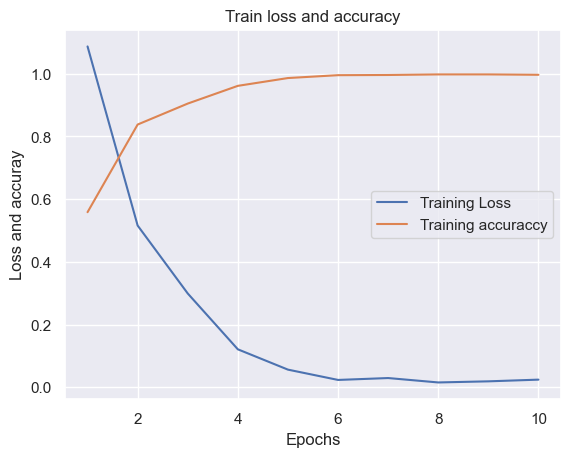

In [132]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs,train_acc,label = 'Training accuraccy')
plt.title('Train loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss and accuray')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
# !pip install h5py

In [75]:
model2.save("model3.h5")

In [72]:
from tensorflow import keras

In [2]:
predict = keras.models.load_model("model3.h5")

In [156]:
def prediction(img):
    image = img.resize((256,256))
    image = image.convert('RGB')
    img_array = np.array(image)
    img = img_array/255.0
    original_shape = (256, 256, 3)
    new_shape = (1,) + original_shape

    # Create a numpy array with the new shape
    new_array = np.empty(new_shape, dtype=np.uint8)
    
    y_pred = predict.predict(new_array)
    
    result = y_pred[0]
    if result[0]==1:
        return ("Fetal abdomen")
    elif result[1]==1:
        return ("Fetal brain")
    elif result[2]==1:
        return ("Fetal femur")
    else:
        return ('Fetal thorax')

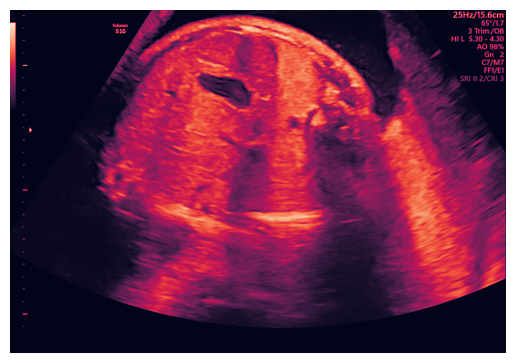

1/1 [==============================] - 1s 545ms/step
Fetal abdomen


In [139]:
image_path = r'./External Test images/Patient01695_Plane2_1_of_1.png'
img = Image.open(image_path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()
prediction(img)

In [140]:
test_data = os.listdir('./External test images')

In [141]:
len(test_data)

40

In [142]:
x_test = test_data[:20]

In [157]:
result = []
for i in range(20):
    image_path = r'./External test images/'+x_test[i]
    img = Image.open(image_path)
    result.append(prediction(img))
    
    

1/1 [==============================] - 0s 47ms/step


In [158]:
result

['Fetal thorax',
 'Fetal brain',
 'Fetal abdomen',
 'Fetal thorax',
 'Fetal femur',
 'Fetal brain',
 'Fetal thorax',
 'Fetal brain',
 'Fetal femur',
 'Fetal brain',
 'Fetal brain',
 'Fetal brain',
 'Fetal thorax',
 'Fetal brain',
 'Fetal brain',
 'Fetal brain',
 'Fetal femur',
 'Fetal femur',
 'Fetal femur',
 'Fetal femur']

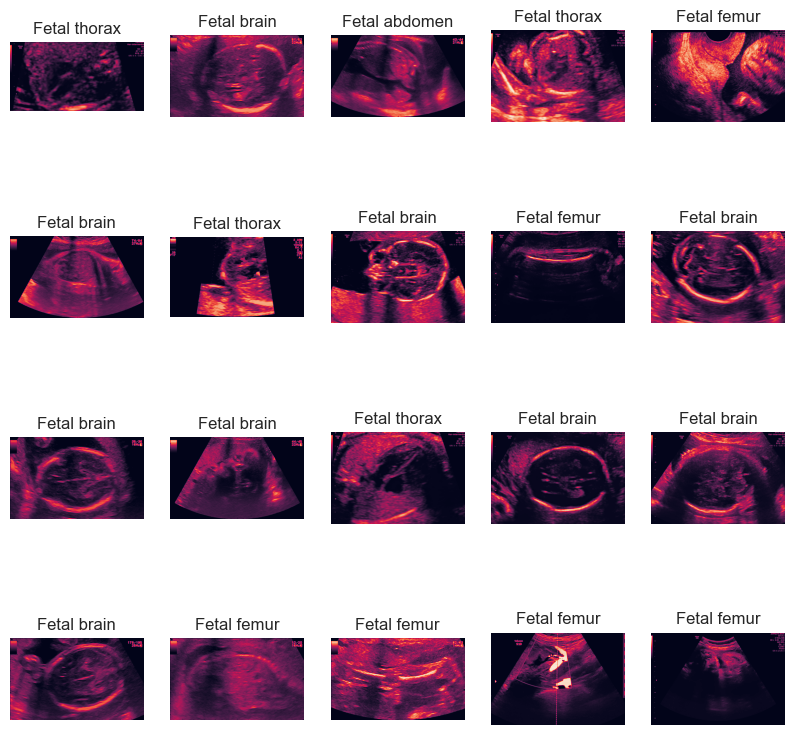

In [168]:
plt.figure(figsize=(10,10))
for i in range(20):
    image_path = r'./External test images/'+x_test[i]
    ax = plt.subplot(4,5,i+1)
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(result[i])
    plt.axis('off')
    

In [169]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)      

In [3]:
predict.save_weights("model-weights.h5")